In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit_aer import AerSimulator
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import UGate
from numpy import pi, random

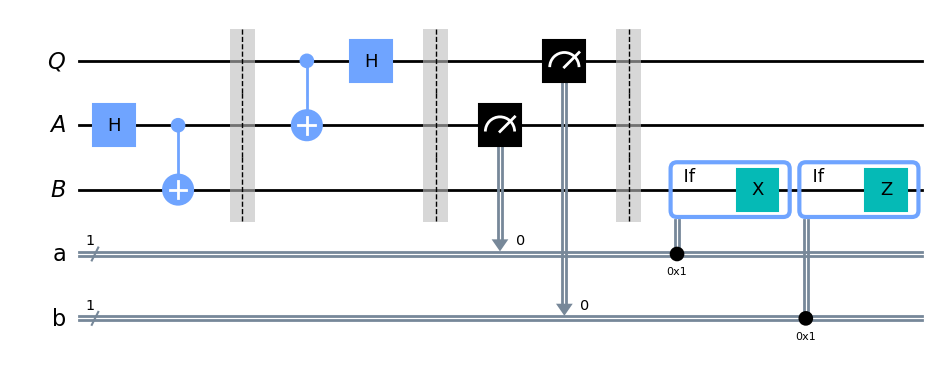

"\n# Print State Vector\nsimulator = Aer.get_backend('statevector_simulator')\nresultado = execute(protocol, simulador).result()\nvector_estado = resultado.get_statevector()\nvector_estado.draw(output='latex')\n"

In [42]:
# Teleportation protocol
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier() # Ensures that above operations have finished their executions already

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alices measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to confitionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b,1)):
    protocol.z(ebit1)

# Draw Circuit
display(protocol.draw('mpl'))

"""
# Print State Vector
simulator = Aer.get_backend('statevector_simulator')
resultado = execute(protocol, simulador).result()
vector_estado = resultado.get_statevector()
vector_estado.draw(output='latex')
"""

In [63]:
# Testing that the protocol works correctly
random_gate = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi
)

display(random_gate.to_matrix())

array([[-0.4444216 +0.j        ,  0.50266249+0.74149839j],
       [-0.38966018+0.80663151j, -0.43971099+0.0645353j ]])

/home/yerko/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


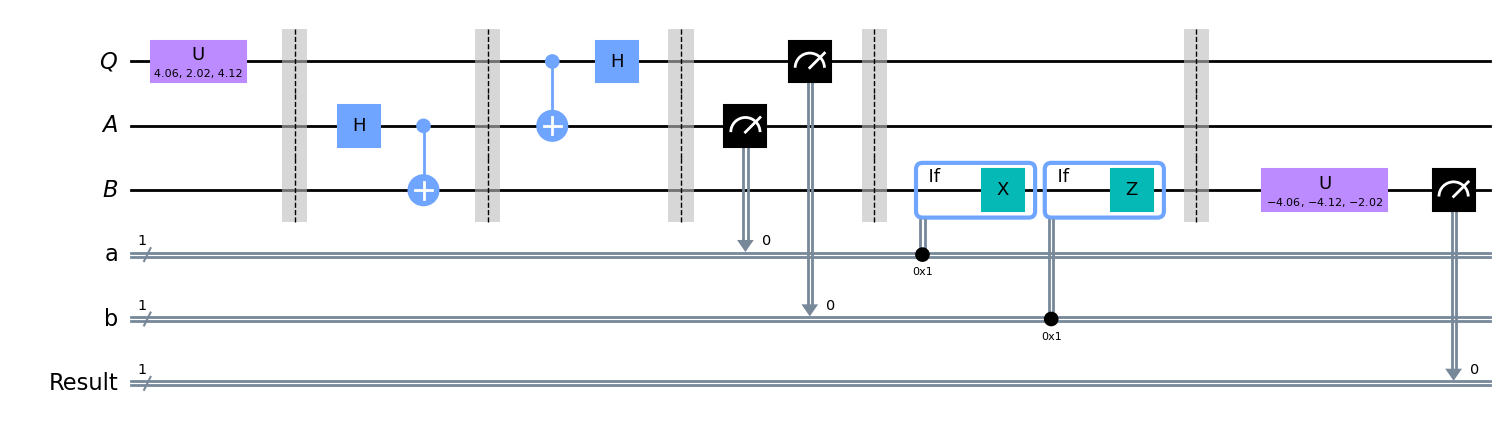

In [65]:
# Creating a new testing circuit

# Create a new circuit including the same bits and qubits used in the teleportation protocol

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above
test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw('mpl'))

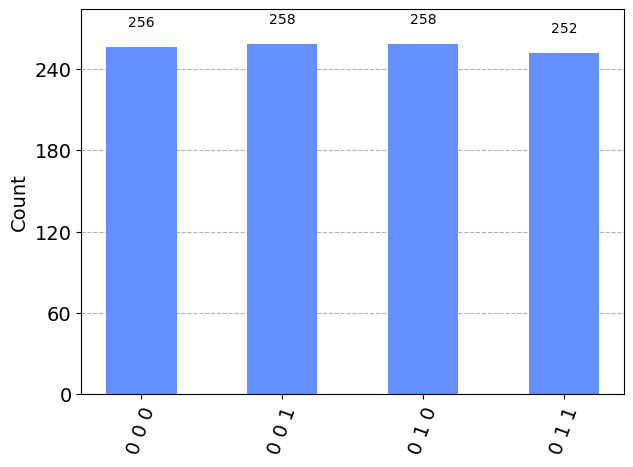

In [66]:
# Plotting a histogram of the outputs
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

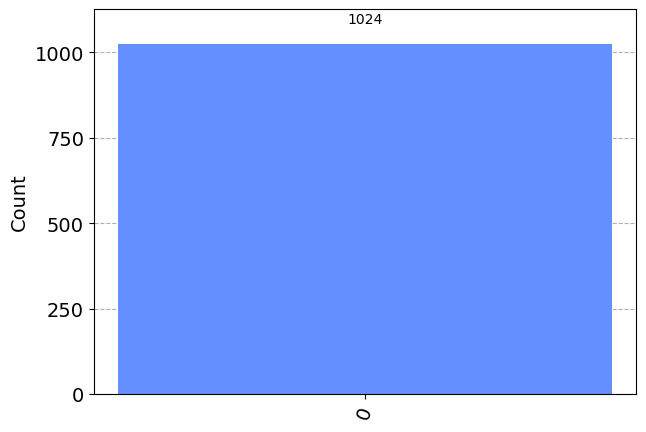

In [67]:
# Filter the statistics to focus just on the test result qubit if we wish
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))